# setting up file to build NNs with BRAD

In [ ]:
"""
This script builds and trains a neural network to predict elements in the adata.obs columns using selected biomarkers.

Arguments (eight arguments):
    1. output directory: chatstatus['output-directory']
    2. output file: <name of output model file>
    3. input .csv file: a CSV file containing a 'States' column with a list of genes
    4. number of sensors (int): an integer specifying the number of biomarkers to use
    5. hidden nodes (int): number of nodes in the hidden layers
    6. epochs (int): number of training epochs, choose less than 500
    7. batch size (int): number of data per training batch, choose less than 400
    8. number of hidden layers (int): number of hidden layers in the network


Usage:
Command Line:
python <path/to/script/>trainNeuralNetwork.py <output path> <output model file> <input CSV> <num sensors> <hidden nodes> <epochs> <batch size> <number of hidden layers>
                                                     |              |              |           |                 |          |           |                 |
                                                 Argument 1     Argument 2    Argument 3   Argument 4        Argument 5 Argument 6 Arugment 7         Arument 8
Template BRAD Line:
subprocess.run([sys.executable, '<path/to/script/>/trainNeuralNetwork.py', chatstatus['output-directory'], <output model file>, <input CSV>, <num sensors>, <hidden nodes>, <epochs>, <batch size>, <number of hidden layers>], capture_output=True, text=True)

Example BRAD Line:
subprocess.run([sys.executable, '<path/to/script/>/trainNeuralNetwork.py', chatstatus['output-directory'], <output model file>, <input CSV>, 25, 10, 100, 50, 3], capture_output=True, text=True)

*Always replace <path/to/script> with the correct path given above.*

Neural Network Training:
------------------------
This script loads a .h5ad AnnData object, extracts biomarkers (features) from the provided list of genes, and trains a neural network to predict a target from adata.obs. The model can be customized with parameters like number of hidden layers, learning rate, and epochs.

Steps:
1. Load the input CSV file with a 'States' column to select biomarkers (genes).
2. Extract the biomarker data from the .h5ad AnnData object.
3. Build a neural network model based on the given parameters.
4. Train the model to predict target variables from adata.obs.
5. Save the model and output training metrics such as total loss and error.

**OUTPUT FILE NAME INSTRUCTIONS**
1. Output path should be chatstatus['output-directory']
2. Output file name should be NN-<descriptive name>.h5
"""

import sys
import os
import numpy as np
import pandas as pd
import anndata
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt

def main()
    outputPath   = sys.argv[1] # chatstatus['output-directory']
    outputFile   = sys.argv[2] # output file name
    inputFile    = sys.argv[3]
    numSensors   = int(sys.argv[4])
    hidden_units = int(sys.argv[5])
    epochs       = int(sys.argv[6])
    batch_size   = int(sys.argv[7])
    num_hidden_layers = int(sys.argv[8])
    
    nn_params = {
        'num_hidden_layers' : num_hidden_layers,
        'hidden_units'      : hidden_units,
        'epochs'            : epochs,
        'batch_size'        : batch_size
    }
    
    # Load dataset
    adata_file_path = '/nfs/turbo/umms-indikar/shared/projects/public_data/time_series_RNA/mitoticExit/krenning.pkl'
    with open(adata_file_path, 'rb') as file:
        adata = pickle.load(file)
    adata.var['Gene'] = adata.var.index.str.split('__').str[0]
    adata.var.index = adata.var['Gene']

    # Load biomarker set
    df = pd.read_csv('/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/biomarker-eval/2024-09-19_10-20-12/S2-2015.csv')
    biomarkers = df['state'].head(numSensors).tolist()  # Select the top numSensors biomarkers

    # Format dataset as X and y pairs of features and labels
    idxs = []
    for bmkr in biomarkers:
        if bmkr in adata.var['Gene']:
            idxs.append(list(adata.var['Gene']).index(bmkr))
    print(f"{len(idxs)=}")
    X = adata[:, idxs].X
    y = adata.obs['time'].values  # Modify this to select the appropriate target column

    # Build Feed-Forward Neural Network
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(X.shape[1],)))
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(output_units))
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy', 'Precision', 'Recall'])

    # Train the model
    history = model.fit(X, y, epochs=nn_params['epochs'], batch_size=nn_params['batch_size'], validation_split=0.2)
    plt.figure(figsize=(8, 6), dpi=300)  # High resolution
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-', marker='o', markersize=4)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='s', markersize=4)
    plt.grid(True)
    plt.legend(loc='lower right', fontsize=24,  # Larger font size
               frameon=True, facecolor='white', edgecolor='black',  # Black box with sharp edges
               fancybox=False, framealpha=1)  # Sharp corners, solid box
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()  # Get the current axis
    ax.spines['left'].set_linewidth(2)   # Left spine
    ax.spines['bottom'].set_linewidth(2) # Bottom spine
    ax.spines['right'].set_linewidth(2)  # Right spine
    ax.spines['top'].set_linewidth(2)    # Top spine
    sns.despine()
    plt.savefig(os.path.join(outputPath, 'training_accuracy.png'))

    # Save the model and history to a pickle file
    

if __name__ == "__main__":
    main()

# Scratch

In [1]:
"""
This script builds and trains a neural network to predict elements in the adata.obs columns using selected biomarkers.

Arguments (five arguments):
    1. output directory: chatstatus['output-directory']
    2. output file: <name of output model file>
    3. input .csv file: a CSV file containing a 'States' column with a list of genes
    4. number of sensors: an integer specifying the number of biomarkers to use
    5. neural network parameters: parameters for building and training the neural network (e.g., number of hidden layers, learning rate, etc.)

Usage:
Command Line:
python <path/to/script/>trainNeuralNetwork.py <output path> <output model file> <input CSV> <num sensors> <neural network parameters>

                                                     |              |              |           |                 |
                                                 Argument 1     Argument 2    Argument 3   Argument 4     Argument 5
BRAD Line:
subprocess.run([sys.executable, '<path/to/script/>/trainNeuralNetwork.py', chatstatus['output-directory'], <output model file>, <input CSV>, <num sensors>, <nn params>], capture_output=True, text=True)

*Always replace <path/to/script> with the correct path given above.*

Neural Network Training:
------------------------
This script loads a .h5ad AnnData object, extracts biomarkers (features) from the provided list of genes, and trains a neural network to predict a target from adata.obs. The model can be customized with parameters like number of hidden layers, learning rate, and epochs.

Steps:
1. Load the input CSV file with a 'States' column to select biomarkers (genes).
2. Extract the biomarker data from the .h5ad AnnData object.
3. Build a neural network model based on the given parameters.
4. Train the model to predict target variables from adata.obs.
5. Save the model and output training metrics such as total loss and error.

**OUTPUT FILE NAME INSTRUCTIONS**
1. Output path should be chatstatus['output-directory']
2. Output file name should be NN-<descriptive name>.h5
"""

import sys
import os
import numpy as np
import pandas as pd
import anndata
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models



In [16]:
numSensors = 10
nn_params = {
    'num_hidden_layers': 3,
    'hidden_units': 10,
    'epochs': 50,
    'batch_size': 100
}

In [17]:
# Hardcoded AnnData file path
adata_file_path = '/nfs/turbo/umms-indikar/shared/projects/public_data/time_series_RNA/mitoticExit/krenning.pkl'
with open(adata_file_path, 'rb') as file:
    adata = pickle.load(file)
adata.var['Gene'] = adata.var.index.str.split('__').str[0]
adata.var.index = adata.var['Gene']
adata.var

,Gene
Gene,
A1BG-AS1,A1BG-AS1
A1BG,A1BG
A1CF,A1CF
A2M-AS1,A2M-AS1
A2ML1,A2ML1
...,...
ZNF521,ZNF521
ZNF711,ZNF711
ZNF844,ZNF844


In [18]:
df = pd.read_csv('/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/biomarker-eval/2024-09-19_10-20-12/S2-2015.csv')
biomarkers = df['state'].head(numSensors).tolist()  # Select the top numSensors biomarkers

In [19]:
idxs = []
for bmkr in biomarkers:
    if bmkr in adata.var['Gene']:
        idxs.append(list(adata.var['Gene']).index(bmkr))
print(f"{len(idxs)=}")

len(idxs)=10


In [20]:
X = adata[:, idxs].X
y = adata.obs['time'].values  # Modify this to select the appropriate target column

In [21]:
def build_neural_network(input_shape, num_hidden_layers, hidden_units, output_units):
    """Builds a neural network model based on the specified architecture."""
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # Adding hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_units, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(output_units))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
    
model = build_neural_network(input_shape=(X.shape[1],), 
                             num_hidden_layers=nn_params['num_hidden_layers'],
                             hidden_units=nn_params['hidden_units'],
                             output_units=y.shape[0])

/home/jpic/.local/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
X = X.astype(np.float32)
y = pd.get_dummies(adata.obs['phase'], prefix='phase')

In [31]:
y.shape

(841, 2)

In [25]:
num_hidden_layers = 3
hidden_units = 10
output_units = 2
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X.shape[1],)))

# Adding hidden layers
for _ in range(num_hidden_layers):
    model.add(layers.Dense(hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(output_units))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy', 'Precision', 'Recall'])

model

/home/jpic/.local/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


<Sequential name=sequential_5, built=True>

In [26]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.1049 - Recall: 0.0853 - accuracy: 0.1561 - loss: 1371.1736 - mae: 26.0431 - val_Precision: 0.5179 - val_Recall: 0.1716 - val_accuracy: 0.3254 - val_loss: 127.8672 - val_mae: 6.6967
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5498 - Recall: 0.0846 - accuracy: 0.2236 - loss: 38.4979 - mae: 3.3621 - val_Precision: 0.6296 - val_Recall: 0.3018 - val_accuracy: 0.3669 - val_loss: 35.6422 - val_mae: 2.9954
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.6240 - Recall: 0.2273 - accuracy: 0.5805 - loss: 5.7839 - mae: 1.0516 - val_Precision: 0.3472 - val_Recall: 0.2959 - val_accuracy: 0.3314 - val_loss: 19.4038 - val_mae: 2.3197
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4828 - Recall: 0.3927 - accuracy: 0.5436 - loss: 2.6541 - mae: 0.8204 - val_Precision: 0.6392 - val_Recall: 0.5976 - val_accuracy: 0.6923 - val_loss: 13.6893 - val_mae: 1.8395
Epoch 5/50
68/68 ━━━━━━━━━━━━━

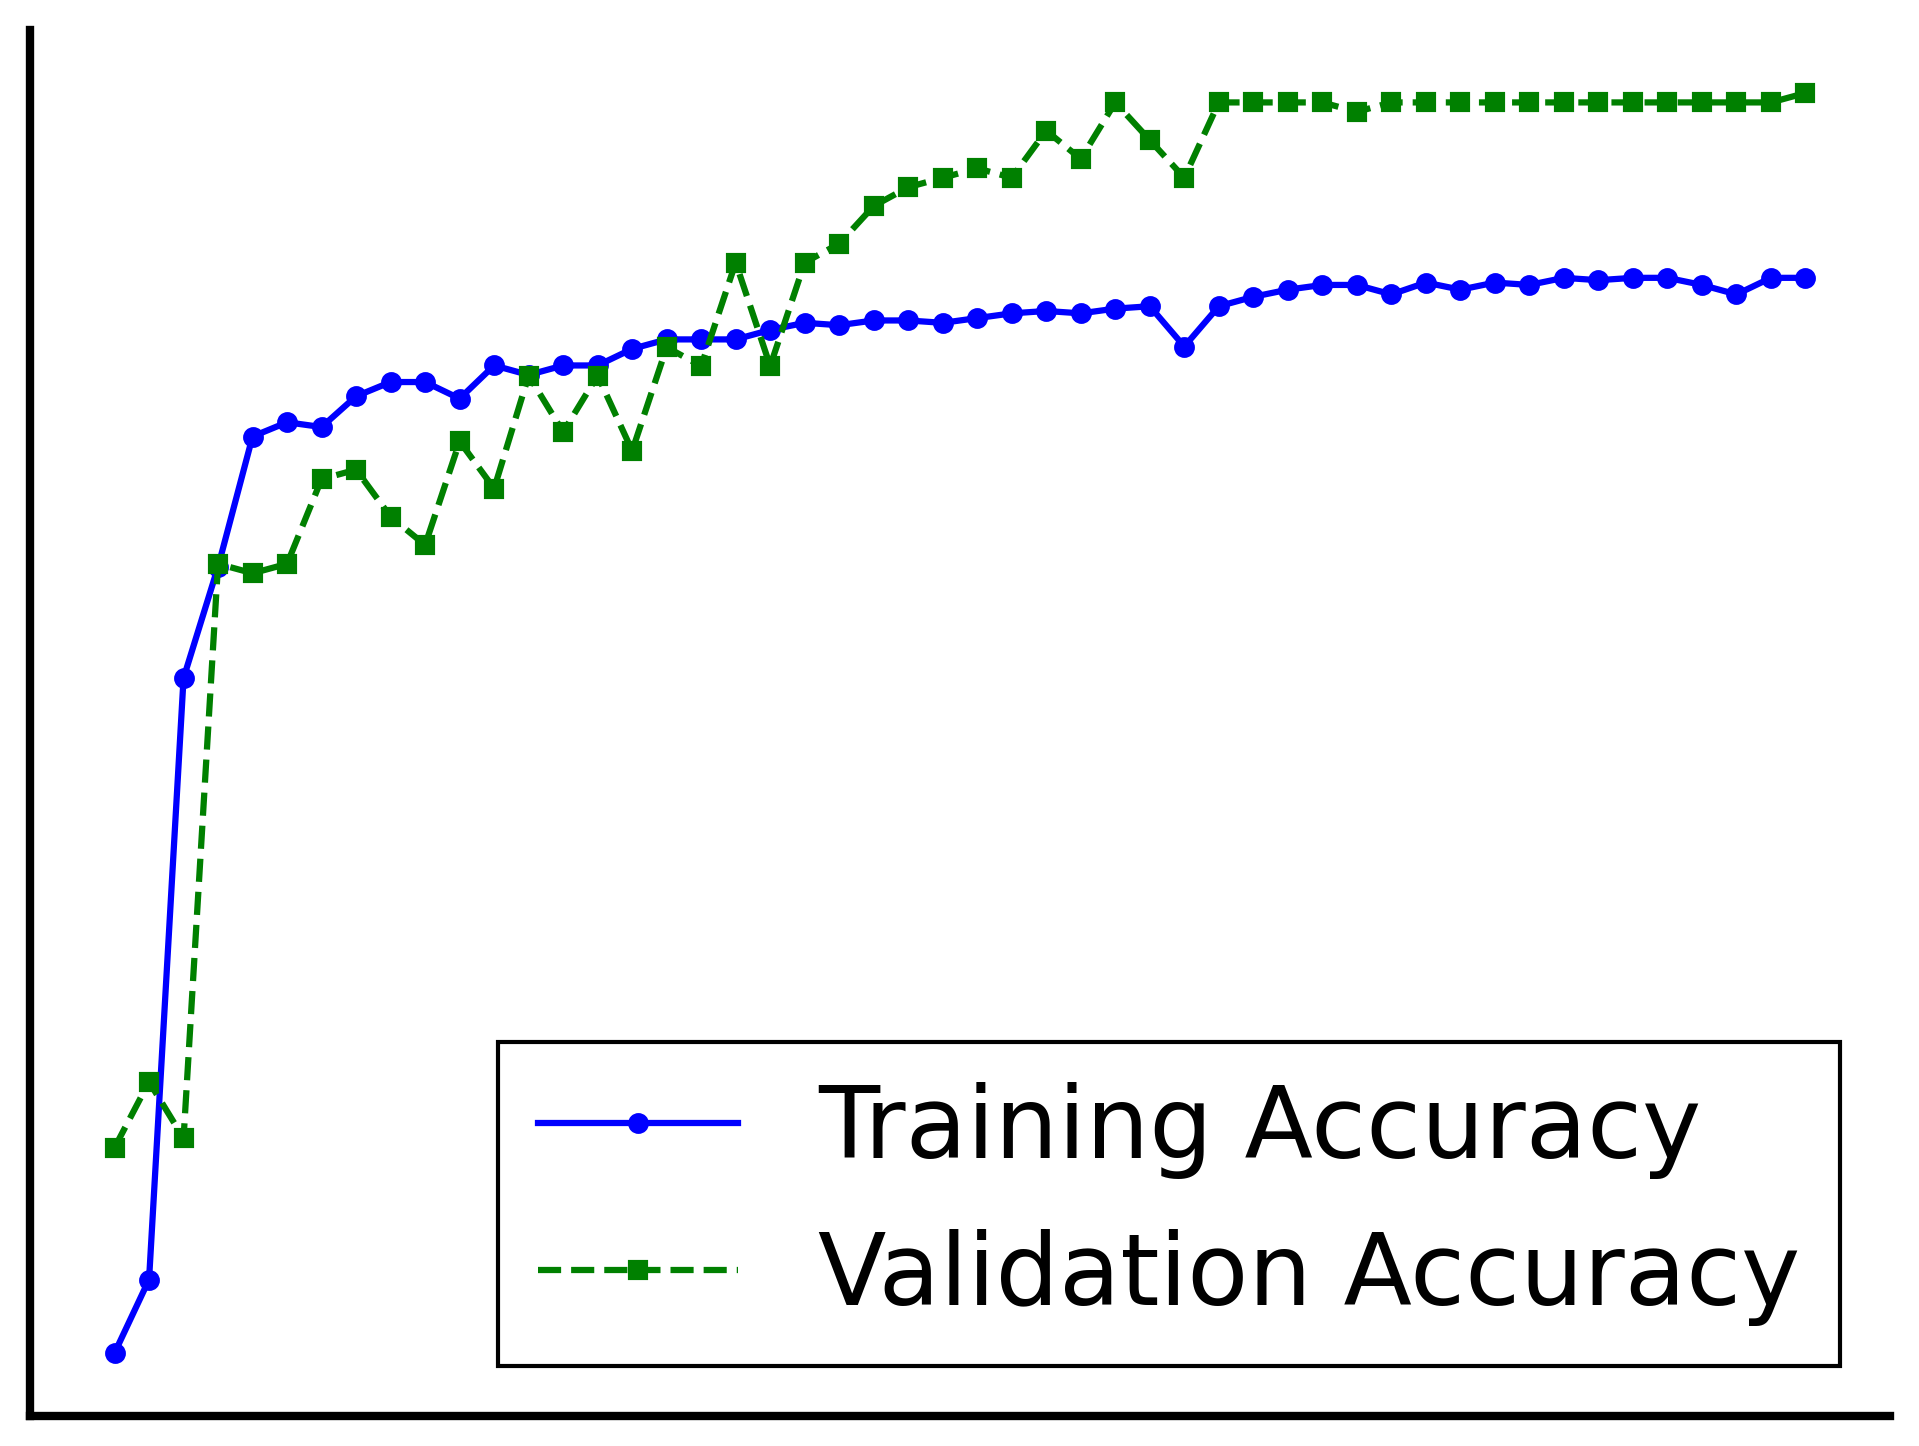

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=300)  # High resolution

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='s', markersize=4)

# Add grid
plt.grid(True)

# Customize the legend
plt.legend(loc='lower right', fontsize=24,  # Larger font size
           frameon=True, facecolor='white', edgecolor='black',  # Black box with sharp edges
           fancybox=False, framealpha=1)  # Sharp corners, solid box

# Increase font sizes for publication
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xticks([])
plt.yticks([])

# Thicken the spines
ax = plt.gca()  # Get the current axis
ax.spines['left'].set_linewidth(2)   # Left spine
ax.spines['bottom'].set_linewidth(2) # Bottom spine
ax.spines['right'].set_linewidth(2)  # Right spine
ax.spines['top'].set_linewidth(2)    # Top spine

# Despine for cleaner look (removes top and right spines)
sns.despine()

# Show the plot
plt.show()

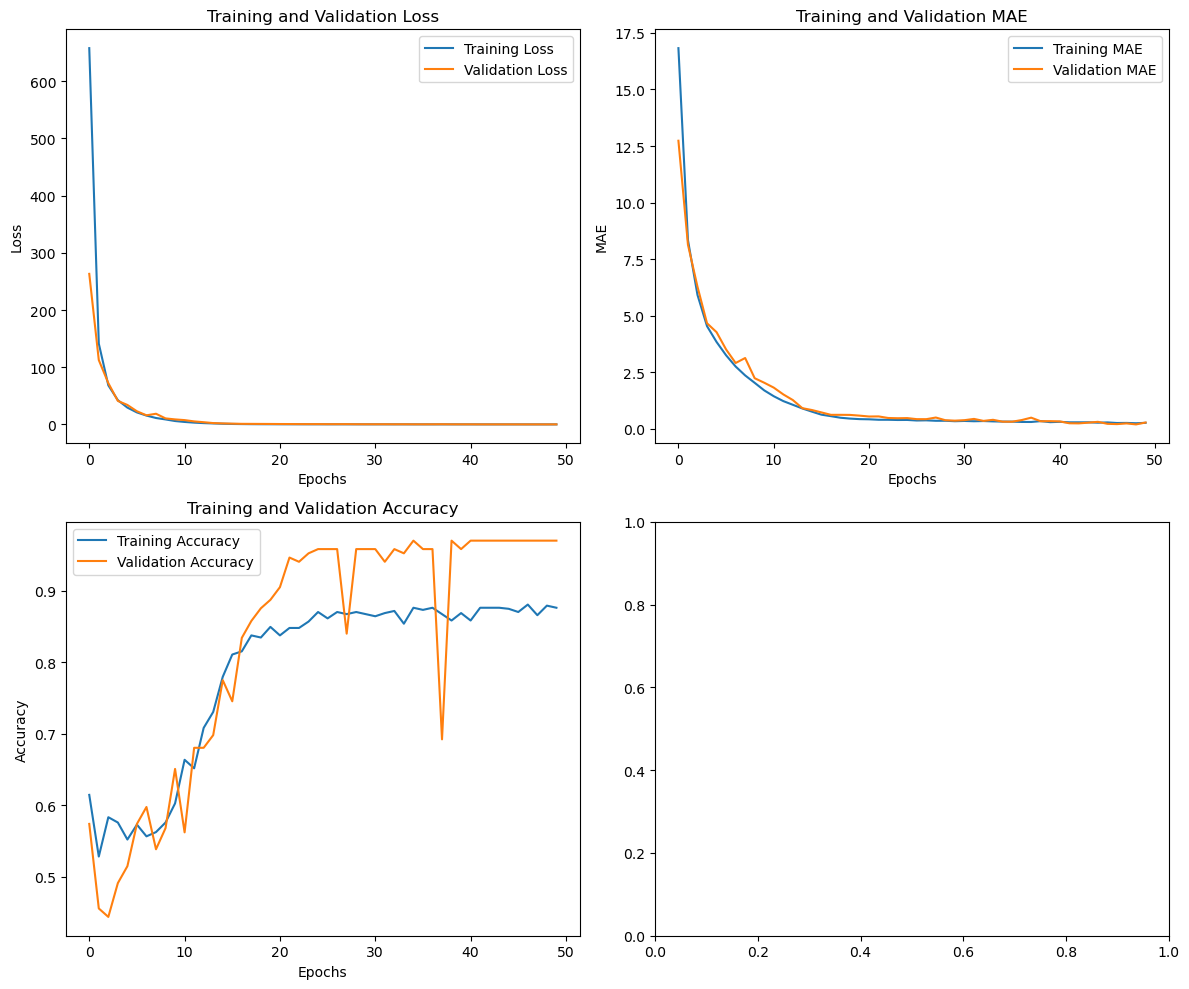

In [33]:
import matplotlib.pyplot as plt

# Create a 4x4 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Plot Mean Absolute Error (MAE)
axes[0, 1].plot(history.history['mae'], label='Training MAE')
axes[0, 1].plot(history.history['val_mae'], label='Validation MAE')
axes[0, 1].set_title('Training and Validation MAE')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()

# Plot Accuracy (if available)
if 'accuracy' in history.history:
    axes[1, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1, 0].set_title('Training and Validation Accuracy')
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()

# Plot Precision (if available)
if 'precision' in history.history:
    axes[1, 1].plot(history.history['precision'], label='Training Precision')
    axes[1, 1].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 1].set_title('Training and Validation Precision')
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


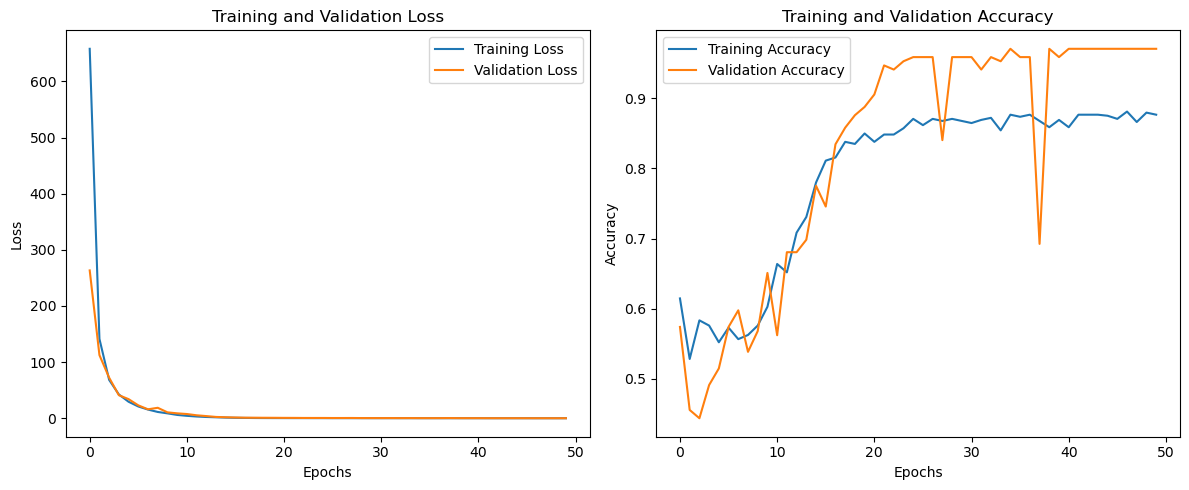

In [32]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object

# Plot the training and validation loss over epochs
plt.figure(figsize=(12, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for Accuracy (if available in the model)
plt.subplot(1, 2, 2)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [28]:
one_hot_encoded = pd.get_dummies(adata.obs['phase'], prefix='phase')
one_hot_encoded.values.shape

(841, 2)

In [ ]:
def build_neural_network(input_shape, num_hidden_layers, hidden_units, output_units):
    """Builds a neural network model based on the specified architecture."""
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # Adding hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_units, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(output_units))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def main():
    outputPath = sys.argv[1]  # chatstatus['output-directory']
    outputFile = sys.argv[2]  # output model file name
    inputCSV = sys.argv[3]    # input .csv file with biomarkers
    numSensors = int(sys.argv[4])  # number of biomarkers to use
    nn_params = eval(sys.argv[5])  # neural network parameters as a dictionary

    print('*******************************')
    print('   Neural Network Training      ')
    print('*******************************')
    print(f"Output Path: {outputPath}")
    print(f"Output File: {outputFile}")
    print(f"Input CSV: {inputCSV}")
    print(f"Number of Sensors: {numSensors}")
    print(f"Neural Network Parameters: {nn_params}")

    # Load the biomarkers from the input CSV
    df = pd.read_csv(inputCSV)
    biomarkers = df['States'].head(numSensors).tolist()  # Select the top numSensors biomarkers
    
    # Load AnnData object
    adata = anndata.read_h5ad(adata_file_path)
    
    # Extract biomarker data as input features
    X = adata[:, biomarkers].X
    y = adata.obs['target_column'].values  # Modify this to select the appropriate target column
    
    # Build the neural network
    model = build_neural_network(input_shape=(X.shape[1],), 
                                 num_hidden_layers=nn_params['num_hidden_layers'],
                                 hidden_units=nn_params['hidden_units'],
                                 output_units=y.shape[1])
    
    # Train the model
    history = model.fit(X, y, epochs=nn_params['epochs'], batch_size=nn_params['batch_size'], validation_split=0.2)

    # Output training stats
    print(f"Final Loss: {history.history['loss'][-1]}")
    print(f"Final Validation Loss: {history.history['val_loss'][-1]}")
    
    # Save the model
    output_file_path = os.path.join(outputPath, outputFile)
    model.save(output_file_path)
    
    print(f"Model saved to {output_file_path}")

if __name__ == "__main__":
    main()
